In [2]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
import math

/tmp/ipykernel_16800/1065836457.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


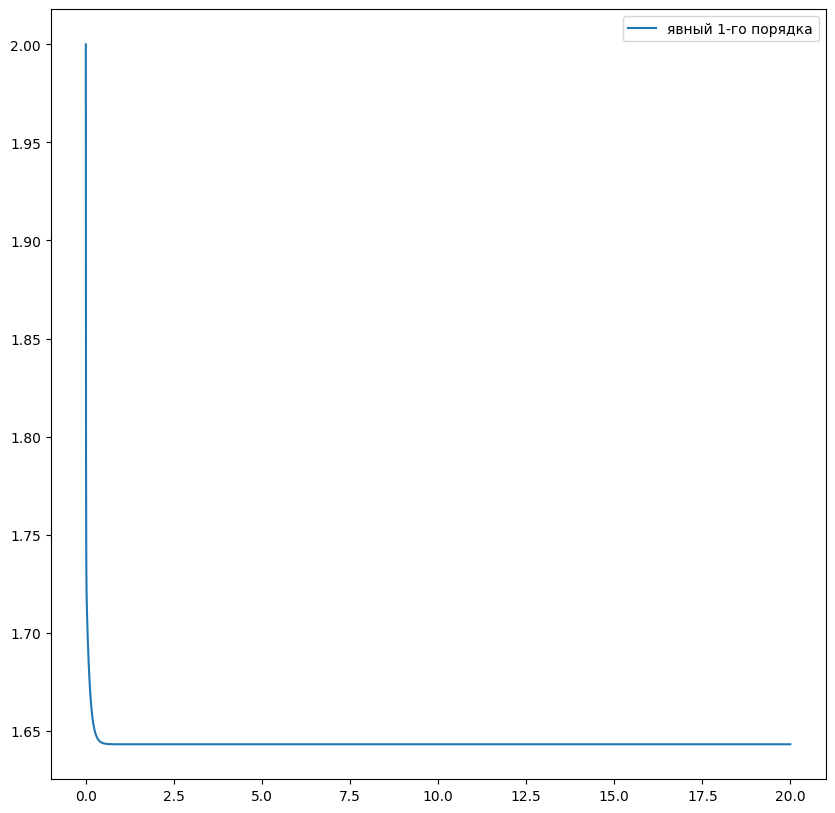

In [3]:
s_t, s_x, s_y, s_z = 0, 0, 0, 0
C1 = 1
C2 = 2
x_d = (C1+3*C2*s_t) * math.e**(2*s_t)
y_d = (C2 - C1 - 3 * C2 * s_t) * math.e**(2*s_t)

T = 0.001
Tl = 0

x_deriv = s_x + s_z - s_y
y_deriv = s_x + s_y - s_z
z_deriv = 2 * s_x - s_y

t_start = 0
t_finish = 20

a = 100
c = 0.5
b = 1
tn = t_start
t = tn + T
arrayx1 = [2]
arrayy1 = [0]
tl = [tn]
while t <= t_finish:
    tl.append(t)
    t += T
for i in range(1, len(tl)):
    t = tl[i]
    xvn = arrayx1[-1]
    yvn = arrayy1[-1]
    #явный метод 1-го порядка
    xn1 = T*(-a*((xvn**3)/3-xvn)+a*yvn) + xvn
    yn1 = T*(-xvn - b*yvn) + yvn
    arrayx1.append(xn1)
    arrayy1.append(yn1)


f = plt.figure(figsize=(10, 10))
px1 = f.add_subplot(111)
px1.plot(tl, arrayx1, label="явный 1-го порядка")
px1.legend()
f.show() 